# Construcción de modelos de aprendizaje de máquina con Scikit Learn

Aunque hay varias bibliotecas de Python que proporcionan implementaciones de una variedad de algoritmos de aprendizaje automático, la más conocida y usada es [Scikit-Learn](https://scikit-learn.org/stable/), un paquete que proporciona versiones eficientes de una gran cantidad de algoritmos comunes. Scikit-Learn se caracteriza por una ambiente limpio, uniforme y optimizado, así como por una documentación online muy útil y completa. Un beneficio de esta uniformidad es que una vez que comprende el uso básico y la sintaxis de Scikit-Learn para un tipo de modelo, cambiar a un nuevo modelo o algoritmo es muy sencillo.

En esta sección se proporciona una descripción general de la API de Scikit-Learn; una comprensión sólida de estos elementos de la API formará la base para comprender la discusión práctica más profunda de los algoritmos y enfoques de aprendizaje automático en los siguientes capítulos.

Comenzaremos cubriendo la representación de datos en Scikit-Learn, seguido de la API de *Estimator* y, finalmente, veremos ejemplos del uso de estas herramientas.

# Representación de datos en Scikit-Learn

 La mejor manera de pensar en los datos dentro de Scikit-Learn es en términos de tablas de datos.

Una tabla básica es una cuadrícula bidimensional de datos, en la que las filas representan elementos individuales del conjunto de datos y las columnas representan cantidades relacionadas con cada uno de estos elementos.

Aunque es posible cargar algunas fuentes de datos directamente en Scikit Learn, lo común es apoyarse en otras librerías como [Pandas](https://pandas.pydata.org/docs/#) o [Polars](https://pola.rs/) para esta tarea.

In [1]:
import pandas as pd

Vamos a trabajar con un dataset disponible en el [repositorio de la Universidad de California en Irvine](https://archive.ics.uci.edu/).

Este dataset contiene información sobre la eficiencia de combustible de varios automóviles, medida en millas por galón, junto con otros atributos de los vehículos. Este conjunto de datos se usa ampliamente para modelado predictivo y análisis exploratorio de datos.

**Características clave del conjunto de datos**

**Variable objetivo:** mpg (millas por galón), una variable continua que representa la eficiencia de combustible.

**Atributos:**
- cylinders: Número de cilindros en el motor (entero).
- displacement: Desplazamiento del motor en pulgadas cúbicas (continuo).
- horsepower: Potencia del motor en caballos de fuerza (continuo, puede tener valores faltantes).
- weight: Peso del vehículo en libras (continuo).
- acceleration: Tiempo para acelerar de 0 a 60 mph en segundos (continuo).
- model_year: Año de fabricación (discreto).
- origin: País de origen (discreto: 1 = EE.UU., 2 = Europa, 3 = Asia).
- car_name: Nombre del auto (categórica, identificador único)

Vamos a empezar cargándolo:

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original",
                 sep=r'\s+',
                 header=None,
                 na_values=['?'],
                 names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
                 )
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


En el dataset mostrado arriba, cada fila de los datos hace referencia a un modelo de carro, y el número de filas es el número total de carros del conjunto de datos.

Nos referiremos a las filas de la matriz como **observaciones**, **registros**, **muestras** o **instancias**, y al número de filas como $n\_samples$.

Asimismo, cada columna de los datos hace referencia a un dato cuantitativo concreto que describe cada muestra. En general, nos referiremos a las columnas de la matriz como **características** o **features**, y al número de columnas como $n\_features$.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    float64
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    float64
 5   acceleration  406 non-null    float64
 6   model_year    406 non-null    float64
 7   origin        406 non-null    float64
 8   car_name      406 non-null    object 
dtypes: float64(8), object(1)
memory usage: 28.7+ KB




Si bien algunos estimadores de Scikit-Learn manejan múltiples valores objetivo en forma de una matriz objetivo bidimensional $[n\_samples, n\_targets]$, trabajaremos principalmente con el caso común de un vector objetivo unidimensional.

A menudo, un punto de confusión es cómo el vector objetivo difiere de las otras columnas de características. La característica distintiva del vector objetivo es que suele ser la cantidad que queremos predecir a partir de los datos: en términos estadísticos, es la variable dependiente. Por ejemplo, en los datos anteriores es posible que deseemos construir un modelo que pueda predecir el consumo de gasolina. En este caso, la columna "mpg" se consideraría el vector objetivo.

In [4]:
y = df['mpg']
y.shape

(406,)

Con estos datos correctamente formateados, podemos pasar a trabajar con la API de estimadores de Scikit-Learn:

# API de estimadores de Scikit-Learn

La API de Scikit-Learn está diseñada teniendo en cuenta los siguientes principios rectores, como se describe en el documento de la API de Scikit-Learn:

1. Consistencia: Todos los objetos comparten una interfaz común extraída de un conjunto limitado de métodos, con documentación coherente.

2. Inspección: Todos los valores de parámetro especificados se exponen como atributos públicos.

3. Jerarquía de objetos limitada: solo los algoritmos están representados por clases de Python; Los conjuntos de datos están representados en formatos estándar (arreglos de NumPy, dataframes de Pandas, matrices dispersas de SciPy) y los nombres de los parámetros utilizan cadenas estándar de Python.

4. Composición: Muchas tareas de aprendizaje automático pueden expresarse como secuencias de algoritmos más fundamentales, y Scikit-Learn hace uso de esto siempre que sea posible.

5. Valores predeterminados razonables: cuando los modelos requieren parámetros especificados por el usuario (llamados hiperparámetros), la biblioteca define un valor predeterminado adecuado.

En la práctica, estos principios hacen que Scikit-Learn sea muy fácil de usar, una vez que se comprenden los principios básicos. Todos los algoritmos de aprendizaje automático de Scikit-Learn se implementan a través de la API de estimación, que proporciona una interfaz coherente para una amplia gama de aplicaciones de aprendizaje automático.

## Pasos para implementar un modelo con la API de estimadores de Scikt-Learn

Por lo general, los pasos para utilizar la API de estimadores de Scikit-Learn son los siguientes:

1. Preparar los datos (aunque vamos a ver que a veces eso se hace después)
2. Crear la **matriz de características** y el **vector objetivo**.
3. Partir los datos en subconjuntos de entrenamiento y prueba, de manera aleatoria.
4. Escoger un modelo,  e importar la clase correspondiente en Scikit-Learn.
5. Crear una instancia del modelo con los parámetros deseados (por ahora, pero luego veremos como se **sintonizan**).
6. Entrenar el modelo con los datos de entrenamiento.
7. Evaluar el modelo con los datos de prueba.
8. Hacer predicciones con el modelo entrenado.

A continuación, veremos un ejemplo de aplicación.

# Ejemplo de aprendizaje supervisado: regresión

## Preparación de datos

Como ejemplo de este proceso, consideremos un modelo de regresión lineal simple, es decir, el caso común de ajustar una recta (x,y) a datos.

El primer paso es preparar los datos. Por ahora, lo único que haremos es eliminar los datos nulos que tiene el dataset.

In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    float64
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    float64
 7   origin        392 non-null    float64
 8   car_name      392 non-null    object 
dtypes: float64(8), object(1)
memory usage: 30.6+ KB


## Creación de matriz de características y vector objetivo

La **feature** de nuestro modelo será la variable `weight`, por lo que la matriz de características la formaremos entonces solo con esta columna. Se debe tener en cuenta que esta matriz debe ser un arreglo de Numpy bidimensional, con forma $[n\_samples, n\_features]$.

In [6]:
X = df[['weight']]
print(X.shape)

(392, 1)


El vector objetivo suele ser unidimensional, con longitud $n\_samples$, y generalmente está contenida en un arreglo de NumPy o un DataSerie de Pandas. El vector objetivo puede tener valores numéricos continuos o clases/etiquetas discretas.

En nuestro caso la variable objetivo de nuestro modelo será `mpg`.

In [7]:
y = df['mpg']
print(y.shape)

(392,)


Una buena práctica es *visualizar* los datos con el propósito de identificar patrones en estos:

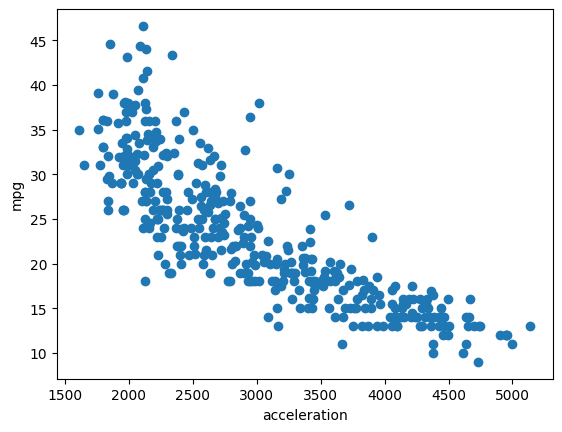

In [8]:
import matplotlib.pyplot as plt
plt.plot(X, y, 'o')
plt.xlabel('acceleration')
plt.ylabel('mpg');

## Partir los datos en subconjuntos de entrenamiento y prueba

Esto es muy importante, porque siempre es necesario contar con al menos un conjunto de datos que no haya sido usado para entrenar el modelo, para **evaluar** que tan bien **generaliza**, es decir, que tan bien hace predicciones con datos nuevos.

En Scikit Learn se puede usar el método `train_test_split`para partir los datos de manera pseudoaleatoria.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    #random_state=42
    )

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(313, 1) (79, 1) (313,) (79,)


## Escoger un modelo

En Scikit-Learn, cada clase de modelo está representada por una clase de Python. Así, por ejemplo, si queremos calcular un modelo de regresión lineal simple, podemos importar la clase `LinearRegression`.

In [10]:
from sklearn.linear_model import LinearRegression

## Crear un objeto con el modelo seleccionado, y parametrizarlo

Un punto importante es que una clase de modelo no es lo mismo que una instancia de un modelo.

Una vez que hayamos decidido nuestra clase de modelo, todavía tenemos algunas opciones abiertas. Dependiendo de la clase de modelo con la que estemos trabajando, es posible que tengamos que responder a una o más preguntas como las siguientes:

- ¿Nos gustaría ajustar el desplazamiento (es decir, la intersección con el eje y)?
- ¿Nos gustaría que el modelo se normalizara?
- ¿Nos gustaría preprocesar nuestras características para agregar flexibilidad al modelo?
- ¿Qué grado de regularización nos gustaría utilizar en nuestro modelo?
- ¿Cuántos componentes del modelo nos gustaría utilizar?

Estos son ejemplos de las decisiones importantes que se deben tomar una vez seleccionada la clase de modelo. Estas opciones a menudo se representan como hiperparámetros o parámetros que deben establecerse antes de que el modelo se ajuste a los datos. En Scikit-Learn, los hiperparámetros se eligen pasando valores en la creación de instancias del modelo.

Para nuestro ejemplo de regresión lineal, podemos crear una instancia de la clase y especificar que nos gustaría ajustar la intersección usando el hiperparámetro `fit_intercept`.

In [11]:
model = LinearRegression(fit_intercept=True)

Tenga en cuenta que cuando se crea una instancia del modelo, la única acción es el almacenamiento de estos valores de hiperparámetros. En particular, aún no hemos aplicado el modelo a ningún dato: la API de Scikit-Learn deja muy clara la distinción entre la *elección del modelo* y la *aplicación del modelo a los datos*.

## Entrenar el modelo

Ahora es el momento de entrenar el modelo con los datos disponible. Esto se hace con el método del modelo `.fit()`

In [12]:
model.fit(X_train, y_train)

LinearRegression()

Este comando hace que se lleven a cabo una serie de cálculos internos dependientes del modelo, y los resultados de estos cálculos se almacenan en **parámetros** específicos del modelo que el usuario puede explorar. En Scikit-Learn, por convención, todos los parámetros del modelo que se aprendieron durante el proceso tienen guiones bajos finales. Por ejemplo, en este modelo lineal, tenemos lo siguiente:

In [13]:
print(f'Pendiente de la línea recta: {model.coef_[0]:.3f}')
print(f'Intersección de la línea recta: {model.intercept_:.3f}')

Pendiente de la línea recta: -0.008
Intersección de la línea recta: 46.487


## Evaluar el modelo entrenado

Una vez entrenado el modelo, debemos evaluarlo para hacernos una idea de que tan bien hace predicciones el modelo con **datos nuevos**.

Para hacer esto necesitamos usar una **métrica de desempeño**, que es una función o criterio que se utiliza para evaluar qué tan bien está funcionando un modelo al realizar una tarea específica. Estas métricas permiten cuantificar el rendimiento del modelo y compararlo con otros modelos o versiones. La elección de la métrica adecuada depende del tipo de problema que se está resolviendo.

En Scikit Learn, las clases de los modelos tienen el método `score()`, que en el caso de los modelos de regresión permiten evaluar los modelos con la métrica conocida como [**coeficiente de determinación**](https://es.wikipedia.org/wiki/Coeficiente_de_determinaci%C3%B3n), o $R^2$ .

In [14]:
# Score con los datos de entrenamiento

print(model.score(X_train, y_train))

0.6918057697989668


In [15]:
# Score con los datos de prueba

print(model.score(X_test, y_test))

0.6878794300302034


En este caso, este valor nos dice que el modelo explica el 70% de la varianza total de los datos de entrenamiento, y el 65% de los datos de prueba, lo que es moderadamente bueno, considerando que el valor máximo es 1.

Luego hablaremos más en profundidad de como evaluar modelos.

En este caso, dado que el modelo solo tiene una característica (una variable predictora), podemos visualizar qué tan bien predice el modelo graficando los valores reales de `mpg` y los valores que predice el modelo. Esto en general no es posible, porque los modelos suelen tener muchas más características.

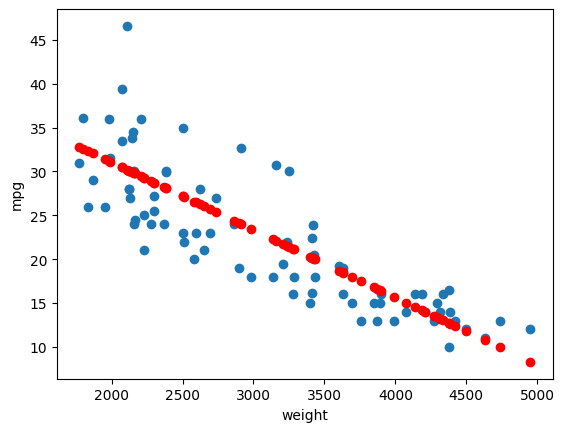

In [16]:
y_pred = model.predict(X_test)
plt.plot(X_test, y_test, 'o')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.plot(X_test, y_pred, 'or');

## Usar el modelo para hacer predicciones

Una vez entrenado el modelo, la tarea principal del aprendizaje automático supervisado es evaluarlo en función de lo que dice sobre los nuevos datos que no formaban parte del conjunto de entrenamiento. En Scikit-Learn, esto se puede hacer usando el método `predict()`. En este ejemplo, nuestros "nuevos datos" serán una cuadrícula de valores $x$, y preguntaremos qué valores $y$ predice el modelo:

In [17]:
import numpy as np

# Se va a estimar cuantas millas por galón recorren vehículos de 2000, 3000 y 6000 libras
X_nuevos = np.array([[2000], [3000], [6000]])
X_nuevos = pd.DataFrame(X_nuevos, columns=['weight'])
X_nuevos

,weight
0,2000
1,3000
2,6000


In [18]:
y_nuevos = model.predict(X_nuevos)
print(y_nuevos)

[31.05784193 23.34322632  0.1993795 ]


In [19]:
X_nuevos['mpg estimado'] = y_nuevos
X_nuevos

,weight,mpg estimado
0,2000,31.057842
1,3000,23.343226
2,6000,0.199380


# Ejercicio

1. Obtenga una nueva variable tomando la inversa multiplicativa de la variable "weight", y vuelva a entrenar el modelo usando esta variable como predictora.

Reporte los coeficientes del modelo.

Haga las mismas predicciones. ¿Qué resultados obtiene?

Evalúe este modelo. ¿Es mejor o peor que el anterior?

2. Construya una matriz de características con las variables "weight" y "cylinders", y entrene nuevamente el modelo usando esta matriz de características.

Reporte los coeficientes del modelo.

Prediga cuantas millas por galón recorren vehículos de las siguientes características:
- Vehículo de 2000 libras de 4 cilindros.
- Vehículo de 3000 libras de 4 cilindros.
- Vehículo de 3000 libras de 8 cilindros.
- Vehículo de 4000 libras de 8 cilindros.

Evalúe este modelo. ¿Es mejor o peor que los anteriores?

3. Instancie un modelo de vecinos más cercanos usando la clase `neighbors.KNeighborsRegressor`, y entrénelo.

Prediga cuantas millas por galón recorren vehículos de las siguientes características:
- Vehículo de 2000 libras de 4 cilindros.
- Vehículo de 3000 libras de 4 cilindros.
- Vehículo de 3000 libras de 8 cilindros.
- Vehículo de 4000 libras de 8 cilindros.

Evalúe este modelo. ¿Es mejor o peor que los anteriores?